# Loading the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_scores.csv")

# Dataset Exploration

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualising the Hours column

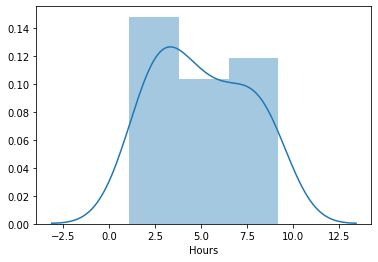

In [6]:
sns.distplot(df['Hours'])

# Visualising the Scores column

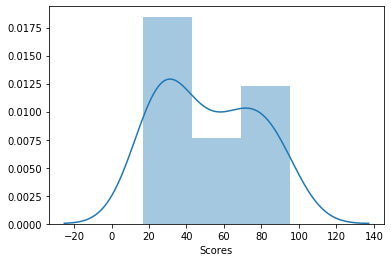

In [7]:
sns.distplot(df['Scores'])

In [8]:
from scipy import stats

In [9]:
plt.style.use("fivethirtyeight")

In [10]:
x = df['Hours']
y = df['Scores']

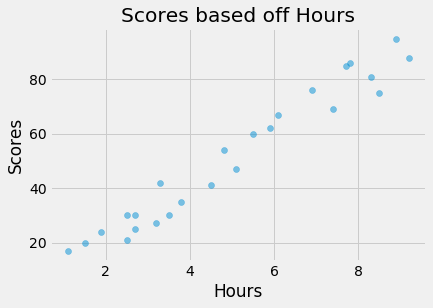

In [11]:
plt.scatter(x, y, alpha=0.5)
plt.title("Scores based off Hours")
plt.xlabel("Hours")
plt.ylabel('Scores')
plt.show()

# Looking at the correlation numerically

In [12]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Splitting the dataset into the independent and dependent features

In [13]:
x = df[['Hours']] # indpendent feature

In [14]:
y = df['Scores'] # dependent feature

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [19]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

# Model Building

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
prediction_y = pd.DataFrame(reg.predict(x_test))

In [25]:
prediction_y

,0
0,83.391686
1,27.070549
2,27.070549
3,69.796929
4,60.086388
5,29.012657
6,34.838982
7,52.317955


# Model Evaluation

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [27]:
#he mean squared error metric is used to tell you how close the regression line is, to a given set of point
reg_mse = mean_squared_error(y_test, prediction_y)

In [28]:
print("Model's mean squared error: " , reg_mse)

Model's mean squared error:  23.61945761415174


In [29]:
# The r2_score metric is used to find out how well the the model has been fitted 
reg_r2_score = r2_score(y_test, prediction_y)

In [30]:
print("Model's r2 score: ", reg_r2_score)

Model's r2 score:  0.9487647340257012


In [31]:
# The mean absolute error metric is takes in only the absolute for each data point and this is done to prevent positive values
# and negative values from cancelling each other out

print("Model's MAE(mean absolute error): ", metrics.mean_absolute_error(y_test, prediction_y))

Model's MAE(mean absolute error):  4.499999999999998


# Calculating the accuracy of the model

In [32]:
reg.score(x_test, y_test)

0.9487647340257012

# Model Accuracy: 95%

# Creating some sample predictions

In [33]:
sample_prediction = reg.predict([[7.5]])

In [34]:
print("Suppose a student was to study around 7.5 hours, their average score would be: {} ".format(sample_prediction))

Suppose a student was to study around 7.5 hours, their average score would be: [75.6232537] 


In [35]:
sample_prediction_2 = reg.predict([[6]])

In [36]:
print("Suppose a student was to study around 6 hours, their average score would be: {} ".format(sample_prediction_2))

Suppose a student was to study around 6 hours, their average score would be: [61.0574423] 


In [37]:
sample_prediction_3 = reg.predict([[9]])

In [38]:
print("Suppose a student was to study around 9 hours, their average score would be: {} ".format(sample_prediction_3))

Suppose a student was to study around 9 hours, their average score would be: [90.1890651] 
